In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
import scipy.stats as stats

In [2]:
lend= pd.read_csv("C:/Users/daniel/Desktop/XYZCorp_LendingData.txt",sep="\t")

C:\Users\daniel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
lend1= lend.copy()

In [4]:
lend1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
lend1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
id                             855969 non-null int64
member_id                      855969 non-null int64
loan_amnt                      855969 non-null float64
funded_amnt                    855969 non-null float64
funded_amnt_inv                855969 non-null float64
term                           855969 non-null object
int_rate                       855969 non-null float64
installment                    855969 non-null float64
grade                          855969 non-null object
sub_grade                      855969 non-null object
emp_title                      806526 non-null object
emp_length                     812908 non-null object
home_ownership                 855969 non-null object
annual_inc                     855969 non-null float64
verification_status            855969 non-null object
issue_d                        855969 non-null object
pymnt_plan           

In [6]:
##To find the percentage of missing values across all columns in the dataset

percent_missing = lend1.isnull().sum() * 100 / len(lend1)
missing_value_df = pd.DataFrame({'column_name': lend1.columns,
                                 'percent_missing': percent_missing})

In [7]:
missing_value_df= missing_value_df.iloc[:,1:3]

In [8]:
missing_value_df

,percent_missing
id,0.000000
member_id,0.000000
loan_amnt,0.000000
funded_amnt,0.000000
funded_amnt_inv,0.000000
...,...
total_rev_hi_lim,7.863953
inq_fi,98.447607
total_cu_tl,98.447607
inq_last_12m,98.447607


In [9]:
##Let us drop columns with high percentage of missing values

lend1.drop(["open_acc_6m","open_il_6m","open_il_12m","open_il_24m","mths_since_rcnt_il","total_bal_il","il_util","open_rv_12m","open_rv_24m","max_bal_bc","all_util","inq_fi","total_cu_tl","inq_last_12m","verification_status_joint","dti_joint","annual_inc_joint","mths_since_last_major_derog","mths_since_last_record","mths_since_last_delinq","desc"],axis=1,inplace=True)

In [10]:
lend1.drop(["next_pymnt_d"],axis=1,inplace=True)

In [11]:
lend1.shape

(855969, 51)

In [12]:
lend1.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                     49443
emp_length                    43061
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
pymnt_plan                        0
purpose                           0
title                            33
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                   

In [13]:
lend1["default_ind"].value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

##"default_ind" is the response variable indicating whether a customer will get a loan or not. However we see there is a spike in the 
#the 0s than 1s, it is an IMBALANCED DATASET. We can either oversample or undersample the data / try other classifiers

In [14]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

In [15]:
lend1["revol_util"].value_counts()

0.00      3361
58.00     1723
53.00     1702
59.00     1694
61.00     1684
          ... 
153.00       1
125.60       1
152.50       1
17.78        1
120.80       1
Name: revol_util, Length: 1338, dtype: int64

In [16]:
from pylab import rcParams
rcParams['figure.figsize']=5,5
corr= lend1.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\daniel\Anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
id,1,0.999431,0.0629712,0.0651918,0.0694912,-0.143769,0.0236475,0.03416,0.0665797,0.0499094,-0.118742,0.0892379,0.0802894,0.0396863,-0.0535384,0.0311476,0.56156,0.561523,-0.593428,-0.589995,-0.553231,-0.457397,-0.0759165,-0.115269,-0.0733992,-0.228774,0.0509213,nan,0.0168485,0.00423287,0.00726127,0.048011,-0.219832
member_id,0.999431,1,0.0636034,0.0658624,0.0702477,-0.142996,0.0243113,0.0343377,0.0666199,0.0501739,-0.11879,0.0893448,0.0809756,0.0397044,-0.0532627,0.0313115,0.56198,0.561943,-0.592951,-0.589419,-0.552938,-0.456508,-0.0763407,-0.115341,-0.0733582,-0.228243,0.0510383,nan,0.0169602,0.00426622,0.00728413,0.0479499,-0.220181
loan_amnt,0.0629712,0.0636034,1,0.999265,0.997601,0.142966,0.94487,0.335209,0.0201887,-0.000738747,-0.0289283,0.198926,-0.0821989,0.337489,0.119635,0.222084,0.639784,0.639786,0.479612,0.480328,0.39588,0.537586,0.0259658,0.075513,0.0551347,0.233596,-0.0170416,nan,0.00357184,-0.00427204,0.32913,0.312072,-0.0049068
funded_amnt,0.0651918,0.0658624,0.999265,1,0.998485,0.143116,0.945903,0.335002,0.0205827,-0.000424113,-0.0292795,0.199432,-0.0818585,0.337405,0.120147,0.222039,0.641706,0.641709,0.47829,0.479172,0.394669,0.536533,0.0255787,0.0750761,0.0548982,0.233134,-0.0168867,nan,0.00367451,-0.00427201,0.329128,0.312071,-0.00579681
funded_amnt_inv,0.0694912,0.0702477,0.997601,0.998485,1,0.143374,0.944149,0.334356,0.0214893,4.97393e-05,-0.0304624,0.200055,-0.0810077,0.33687,0.120931,0.222258,0.644011,0.644023,0.4746,0.478589,0.39101,0.534517,0.0230911,0.0737372,0.0530823,0.232029,-0.0165556,nan,0.00385573,-0.00427095,0.329152,0.312107,-0.00820885
int_rate,-0.143769,-0.142996,0.142966,0.143116,0.143374,1,0.130468,-0.0738247,0.078454,0.0553997,0.231705,-0.0110909,0.0525958,-0.0353445,0.271687,-0.0394819,0.0339334,0.0337896,0.173387,0.174453,0.0592978,0.446517,0.0507426,0.110848,0.0743596,0.107346,0.0128406,nan,0.0264764,0.001129,-0.09143,-0.165533,0.155037
installment,0.0236475,0.0243113,0.94487,0.945903,0.944149,0.130468,1,0.328578,0.0139091,0.00722386,0.00165924,0.183817,-0.0711138,0.320017,0.131928,0.199872,0.53984,0.539835,0.520613,0.521332,0.455444,0.502038,0.0357285,0.0769313,0.0571801,0.243246,-0.0145652,nan,0.0062731,-0.00354003,0.298352,0.286857,0.00475302
annual_inc,0.03416,0.0343377,0.335209,0.335002,0.334356,-0.0738247,0.328578,1,-0.0868209,0.0477494,0.0372506,0.139429,-0.00890941,0.298569,0.0367529,0.188651,0.211549,0.211591,0.163226,0.163275,0.152245,0.130367,0.00986365,0.00761337,0.00680473,0.0926617,-0.00378938,nan,0.0148772,0.00100485,0.422618,0.271059,-0.0370662
dti,0.0665797,0.0666199,0.0201887,0.0205827,0.0214893,0.078454,0.0139091,-0.0868209,1,-0.00267732,-0.00586043,0.142068,-0.0227168,0.0671187,0.0866485,0.106266,0.0580568,0.0580207,-0.0405372,-0.0395632,-0.0508548,0.00875017,-0.00624486,0.00171937,0.00292287,-0.0286013,-0.00011718,nan,0.00322721,-0.00199542,-0.00713257,0.0324302,0.00442868
delinq_2yrs,0.0499094,0.0501739,-0.000738747,-0.000424113,4.97393e-05,0.0553997,0.00722386,0.0477494,-0.00267732,1,0.0229299,0.0515021,-0.011081,-0.0318066,-0.0162994,0.121978,0.0308842,0.0308735,-0.031777,-0.0313459,-0.0380677,0.00137984,0.0139924,-0.000252273,0.00146676,-0.0188053,0.0630186,nan,0.13042,0.000153776,0.0646178,-0.0405745,-0.00918563


In [17]:
from sklearn.impute import SimpleImputer

In [18]:
it= SimpleImputer(strategy='median')

In [19]:
it= it.fit(lend1[["revol_util"]])

In [20]:
lend1["revol_util"]= it.transform(lend1[["revol_util"]]).ravel()

In [21]:
lend1["revol_util"].isna().sum()

0

In [22]:
##Let us take the title column and see the pattern

lend1["title"].value_counts()

Debt consolidation           398089
Credit card refinancing      159228
Home improvement              38633
Other                         30522
Debt Consolidation            15469
                              ...  
My Path to Debt Free              1
education/vacation loan           1
ANGTAN4EVER                       1
commercial fishing vessel         1
Nannys Car                        1
Name: title, Length: 60991, dtype: int64

In [23]:
lend1.title.replace(np.nan,"Other",inplace=True)

In [24]:
##Checking missing values in title with 33 missing values after replacing the empty cells with "Other"

lend1.title.isnull().sum()

0

In [25]:
lend1["last_pymnt_d"].value_counts()
# type(lend1.last_pymnt_d)

Jan-2016    467510
Dec-2015    142783
Jul-2015     14472
Aug-2015     13010
Oct-2015     12503
             ...  
Nov-2008        10
Jun-2008        10
Mar-2008         5
Jan-2008         4
Feb-2008         1
Name: last_pymnt_d, Length: 97, dtype: int64

In [26]:
lend1.replace(" ",np.nan,inplace=True)

In [27]:
lend1.emp_title.replace(np.nan,"Other",inplace=True)

In [28]:
lend1["emp_title"].isnull().sum()

0

In [29]:
lend1["emp_length"].value_counts()

10+ years    282090
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
8 years       42421
6 years       41446
9 years       33462
Name: emp_length, dtype: int64

In [30]:
map= {'10+ years': 10, '< 1 year': 0.5, '2 years': 2, '3 years': 3, '1 year': 1, '5 years': 5, '4 years':4, '7 years': 7, '8 years': 8, '6 years':6, '9 years':9}



lend1["emp_length"]= lend1["emp_length"].replace(map)

In [31]:
lend1["emp_length"].value_counts()

10.0    282090
2.0      75986
0.5      67597
3.0      67392
1.0      54855
5.0      53812
4.0      50643
7.0      43204
8.0      42421
6.0      41446
9.0      33462
Name: emp_length, dtype: int64

In [32]:
from sklearn.impute import SimpleImputer

In [33]:
imr= SimpleImputer(strategy="median")
imr= imr.fit(lend1[["emp_length"]])

lend1["emp_length"]= imr.transform(lend1[["emp_length"]]).ravel()

In [34]:
lend1["emp_length"].isnull().sum()

0

In [35]:
lend1["emp_length"].value_counts()

10.0    282090
6.0      84507
2.0      75986
0.5      67597
3.0      67392
1.0      54855
5.0      53812
4.0      50643
7.0      43204
8.0      42421
9.0      33462
Name: emp_length, dtype: int64

In [36]:
imrp=SimpleImputer(strategy="median")

imrp= imrp.fit(lend1[["tot_coll_amt"]])

lend1["tot_coll_amt"]= imrp.transform(lend1[["tot_coll_amt"]]).ravel()


In [37]:
lend1["tot_coll_amt"].isnull().sum()

0

In [38]:
imrp= imrp.fit(lend1[["tot_cur_bal"]])

lend1["tot_cur_bal"]= imrp.transform(lend1[["tot_cur_bal"]]).ravel()

In [39]:
imrp= imrp.fit(lend1[["total_rev_hi_lim"]])

lend1["total_rev_hi_lim"]= imrp.transform(lend1[["total_rev_hi_lim"]]).ravel()

In [40]:
lend1.isna().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                        0
emp_length                       0
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
pymnt_plan                       0
purpose                          0
title                            0
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util          

In [41]:
lend1["last_pymnt_d"].value_counts()

Jan-2016    467510
Dec-2015    142783
Jul-2015     14472
Aug-2015     13010
Oct-2015     12503
             ...  
Nov-2008        10
Jun-2008        10
Mar-2008         5
Jan-2008         4
Feb-2008         1
Name: last_pymnt_d, Length: 97, dtype: int64

In [42]:
lend1["last_pymnt_d"].replace(np.nan," ",inplace=True)

In [43]:
lend1["last_pymnt_d"].fillna(lend1["last_pymnt_d"].mode(),inplace=True)

In [44]:
lend1["last_pymnt_d"].isna().sum()

0

In [45]:
M= lend1["last_pymnt_d"].str.split("-",n=1,expand=True)

In [46]:
lend1["last_pymnt_d_month"]= M[0]

In [47]:
lend1["last_pymnt_d_year"]= M[1]

In [48]:
lend1["last_pymnt_d_month"].replace(" ",np.nan,inplace=True)

In [49]:
lend1["last_pymnt_d_month"].replace(np.nan," ",inplace=True)

In [50]:
lend1["last_pymnt_d_month"].fillna(lend1["last_pymnt_d_month"].mode(),inplace=True)

In [51]:
lend1["last_pymnt_d_year"].replace(" ",np.nan,inplace=True)

In [52]:
lend1["last_pymnt_d_year"].replace(np.nan," ",inplace=True)

In [53]:
lend1["last_pymnt_d_year"].fillna(lend1["last_pymnt_d_year"].mode(),inplace=True)

In [54]:
lend1["last_pymnt_d_month"].value_counts()

Jan    482152
Dec    155140
Oct     24986
Jul     24721
Aug     23548
Sep     22004
Nov     21400
Jun     20935
May     19314
Mar     18921
Apr     18694
Feb     15292
         8862
Name: last_pymnt_d_month, dtype: int64

In [55]:
month1_map={"Jan":1," ":1,"Dec":12,"Oct":10,"Jul":7,"Aug":8,"Sep":9,"Nov":11,"Jun":6,"May":5,"Mar":3,"Apr":4,"Feb":2}

lend1["last_pymnt_d_month"]= lend1["last_pymnt_d_month"].replace(month1_map)

In [56]:
lend1["last_pymnt_d_year"].value_counts()

2016    467510
2015    267308
2014     66542
2013     26841
2012     11366
          8862
2011      4996
2010      1848
2009       559
2008       137
Name: last_pymnt_d_year, dtype: int64

In [57]:
year1_map={"2016":2016,"2015":2015,"2014":2014,"2013":2013,"2012":2012,"2011":2011,"2010":2010,"2009":2009," ":2016,"2008":2008}

lend1["last_pymnt_d_year"]= lend1["last_pymnt_d_year"].replace(year1_map)

In [58]:
lend1["last_pymnt_d_mod"]= lend1["last_pymnt_d_year"].map(str)+'-'+lend1["last_pymnt_d_month"].map(str)

In [59]:
lend1["last_pymnt_d_mod"]= lend1["last_pymnt_d_mod"].astype('datetime64')

In [60]:
lend1["last_pymnt_d_mod"].value_counts()

2016-01-01    476372
2015-12-01    142783
2015-07-01     14472
2015-08-01     13010
2015-10-01     12503
               ...  
2008-06-01        10
2008-11-01        10
2008-03-01         5
2008-01-01         4
2008-02-01         1
Name: last_pymnt_d_mod, Length: 97, dtype: int64

In [61]:
lend1["last_credit_pull_d"].value_counts()

Jan-2016    701687
Dec-2015     19039
Nov-2015     11388
Oct-2015     10290
Sep-2015      9985
             ...  
Jul-2008         1
May-2007         1
Jul-2007         1
May-2008         1
Jun-2008         1
Name: last_credit_pull_d, Length: 102, dtype: int64

In [62]:
lend1["last_credit_pull_d"].replace(np.nan," ",inplace=True)

In [63]:
lend1["last_credit_pull_d"].fillna(lend1["last_credit_pull_d"].mode(),inplace=True)

In [64]:
lend1["collections_12_mths_ex_med"].value_counts()

0.0     844768
1.0      10320
2.0        709
3.0         80
4.0         22
5.0          7
6.0          2
7.0          1
16.0         1
20.0         1
14.0         1
10.0         1
Name: collections_12_mths_ex_med, dtype: int64

In [65]:
lend1["collections_12_mths_ex_med"].replace(np.nan," ",inplace=True)

In [66]:
lend1["collections_12_mths_ex_med"].fillna(lend1["collections_12_mths_ex_med"].mode(),inplace=True)

In [67]:
##As we see here that id, member_id are unnecessary features along with emp_title as they dont seem to reflect the job position
#of customers with misleading organization names, place names in the place of job titles. We shall remove it

lend1.drop(["id","member_id","emp_title"],axis=1,inplace=True)

In [68]:
lend1.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'pymnt_plan', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'default_ind', 'last_pymnt_d_month',
       'last_pymnt_d_year', 'last_pymnt_d_mod'],
      dtype='object')

In [69]:
lend1_obj= lend1.select_dtypes(include=["object"]).copy()

In [70]:
lend1_obj.columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'application_type'],
      dtype='object')

In [71]:
S= lend1["last_credit_pull_d"].str.split("-",n=1,expand=True)

In [72]:
lend1["last_credit_pull_d_month"]= S[0]

In [73]:
lend1["last_credit_pull_d_year"]= S[1]

In [74]:
lend1["last_credit_pull_d_month"].value_counts()

Jan    709200
Dec     25079
Nov     16813
Oct     15672
Sep     14742
Jul     13016
Aug     12624
Jun     10758
May      9775
Apr      9657
Mar      9644
Feb      8939
           50
Name: last_credit_pull_d_month, dtype: int64

In [75]:
lend1["last_credit_pull_d_year"].value_counts()

2016    701687
2015    102334
2014     31207
2013     12185
2012      5049
2011      2277
2010       868
2009       235
2008        41
2007        36
Name: last_credit_pull_d_year, dtype: int64

In [76]:
lend1["last_credit_pull_d_month"].replace(" ",np.nan,inplace=True)

In [77]:
lend1["last_credit_pull_d_month"].replace(np.nan," ",inplace=True)

In [78]:
lend1["last_credit_pull_d_month"].fillna(lend1["last_credit_pull_d_month"].mode(),inplace=True)

In [79]:
lend1["last_credit_pull_d_year"].replace(" ",np.nan,inplace=True)

In [80]:
lend1["last_credit_pull_d_year"].replace(np.nan," ",inplace=True)

In [81]:
lend1["last_credit_pull_d_year"].fillna(lend1["last_credit_pull_d_year"].mode(),inplace=True)

In [82]:
lend1["last_credit_pull_d_month"].value_counts()

Jan    709200
Dec     25079
Nov     16813
Oct     15672
Sep     14742
Jul     13016
Aug     12624
Jun     10758
May      9775
Apr      9657
Mar      9644
Feb      8939
           50
Name: last_credit_pull_d_month, dtype: int64

In [83]:
year_map={"2016":2016,"2015":2015,"2014":2014,"2013":2013,"2012":2012,"2011":2011,"2010":2010,"2009":2009," ":2016,"2008":2008,"2007":2007}

lend1["last_credit_pull_d_year"]= lend1["last_credit_pull_d_year"].replace(year_map)

In [84]:
month_map={"Jan":1,"Dec":12,"Nov":11,"Oct":10,"Sep":9,"Jul":7,"Aug":8,"Jun":6,"May":5,"Apr":4,"Mar":3,"Feb":2," ":1}

lend1["last_credit_pull_d_month"]= lend1["last_credit_pull_d_month"].replace(month_map)

In [85]:
lend1["last_credit_pull_d_year1"]=lend1["last_credit_pull_d_year"].astype(str)

In [86]:
lend1["last_credit_pull_d_month1"]=lend1["last_credit_pull_d_month"].astype(str)

In [87]:
lend1["last_credit_pull_d_mod"]= lend1["last_credit_pull_d_year1"].map(str)+'-'+lend1["last_credit_pull_d_month1"].map(str)

In [88]:
lend1["last_credit_pull_d_mod"].values.dtype

dtype('O')

In [89]:
lend1["last_credit_pull_d_mod"].unique()

array(['2016-1', '2013-9', '2015-1', '2015-9', '2014-12', '2012-8',
       '2013-3', '2015-12', '2013-8', '2012-11', '2014-3', '2015-4',
       '2014-5', '2015-7', '2012-7', '2012-9', '2013-5', '2015-10',
       '2012-6', '2015-3', '2012-12', '2014-7', '2014-9', '2014-2',
       '2015-6', '2013-10', '2014-4', '2014-10', '2013-2', '2015-11',
       '2012-10', '2013-11', '2014-11', '2012-2', '2012-4', '2015-8',
       '2014-6', '2012-1', '2014-8', '2013-6', '2013-12', '2012-5',
       '2014-1', '2013-7', '2013-4', '2015-5', '2015-2', '2012-3',
       '2011-11', '2011-12', '2013-1', '2011-10', '2011-9', '2011-8',
       '2011-7', '2011-6', '2011-5', '2011-4', '2011-3', '2011-2',
       '2011-1', '2010-12', '2010-11', '2010-10', '2010-9', '2010-8',
       '2010-7', '2010-6', '2010-5', '2010-4', '2010-2', '2010-3',
       '2007-8', '2010-1', '2009-12', '2009-11', '2009-10', '2009-9',
       '2009-7', '2009-8', '2009-6', '2009-5', '2009-4', '2009-3',
       '2009-2', '2009-1', '2008-12', '20

In [90]:
lend1["last_credit_pull_d_mod"]= lend1["last_credit_pull_d_mod"].astype('datetime64')

In [91]:
lend1["issue_d"].value_counts()

Oct-2015    48212
Jul-2015    44906
Oct-2014    37442
Nov-2015    37211
Dec-2015    35638
            ...  
Aug-2007       33
Sep-2008       32
Jul-2007       30
Sep-2007       18
Jun-2007        1
Name: issue_d, Length: 103, dtype: int64

In [92]:
N= lend1["issue_d"].str.split("-",n=1,expand=True)

In [93]:
lend1["issue_d_month"]= N[0]

In [94]:
lend1["issue_d_year"]= N[1]

In [95]:
lend1["issue_d_month"].value_counts()

Oct    109565
Jul     92928
Nov     86141
Aug     74796
Dec     70584
Apr     68057
May     65934
Jun     61874
Sep     60808
Jan     60763
Mar     54297
Feb     50222
Name: issue_d_month, dtype: int64

In [96]:
lend1["issue_d_year"].value_counts()

2015    403697
2014    227865
2013    131678
2012     53035
2011     21636
2010     11529
2009      4716
2008      1562
2007       251
Name: issue_d_year, dtype: int64

In [97]:
year2_map={"2015":2015,"2014":2014,"2013":2013,"2012":2012,"2011":2011,"2010":2010,"2009":2009,"2008":2008,"2007":2007}

lend1["issue_d_year"]= lend1["issue_d_year"].replace(year2_map)

In [98]:
month2_map={"Jan":1,"Dec":12,"Nov":11,"Oct":10,"Sep":9,"Jul":7,"Aug":8,"Jun":6,"May":5,"Apr":4,"Mar":3,"Feb":2}

lend1["issue_d_month"]= lend1["issue_d_month"].replace(month2_map)

In [99]:
lend1["issue_d_mod"]= lend1["issue_d_year"].map(str)+'-'+lend1["issue_d_month"].map(str)

In [100]:
lend1["issue_d_mod"]= lend1["issue_d_mod"].astype('datetime64')

In [101]:
lend1["issue_d_mod"].value_counts()

2015-10-01    48212
2015-07-01    44906
2014-10-01    37442
2015-11-01    37211
2015-12-01    35638
              ...  
2007-08-01       33
2008-09-01       32
2007-07-01       30
2007-09-01       18
2007-06-01        1
Name: issue_d_mod, Length: 103, dtype: int64

In [102]:
lend1.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'pymnt_plan', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'default_ind', 'last_pymnt_d_month',
       'last_pymnt_d_year', 'last_pymnt_d_mod', 'last_credit_pull_d_month',
       'last_credit_pull_d_year', 'last_credit_pull_d_year1

##Let us drop the title (reason for loan) as we have purpose defining it clear for us and remove zip code and use addr_state instead
#and other computed columns for the dates

#issue_d,title,zip_code,last_pymnt_d,last_credit_pull_d,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month
#last_credit_pull_d_year, last_credit_pull_d_year1,last_credit_pull_d_month1,issue_d_month,issue_d_year

In [103]:
lend1.drop(["issue_d","title","zip_code","last_pymnt_d","last_credit_pull_d","last_pymnt_d_month","last_pymnt_d_year","last_credit_pull_d_month",
"last_credit_pull_d_year", "last_credit_pull_d_year1","last_credit_pull_d_month1","issue_d_month","issue_d_year"],axis=1,inplace=True)

In [104]:
fe= lend1["addr_state"].value_counts()

freq= fe/len(lend1)

In [105]:
freq= round(freq,4)


In [106]:
lend1["addr_state_mod"]= lend1["addr_state"].map(freq)

In [107]:
lend1["addr_state_mod"]= lend1["addr_state_mod"].astype(object)

In [108]:
lend1.drop(["addr_state"],axis=1,inplace=True)

In [109]:
lend1["home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [110]:
lendmod= pd.get_dummies(lend1["home_ownership"],prefix='home_ownership',prefix_sep="_")

lend1= pd.concat([lend1,lendmod],axis=1)

In [111]:
lend1.drop(["home_ownership"],axis=1,inplace=True)

In [112]:
fe2= lend1["purpose"].value_counts()

freq1= fe2/len(lend1)

freq1=round(freq1,4)

In [113]:
lend1["purpose_mod"]= lend1["purpose"].map(freq1)

In [114]:
lend1.drop(["purpose"],axis=1,inplace=True)

In [115]:
lend1["purpose_mod"]= lend1["purpose_mod"].astype('category')

In [116]:
grade_map={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7}

lend1["grade"]= lend1["grade"].replace(grade_map)

In [117]:
lend1["grade"].astype(object)

0         2
1         3
2         3
3         3
4         2
         ..
855964    2
855965    2
855966    4
855967    5
855968    2
Name: grade, Length: 855969, dtype: object

In [118]:
submap={'A1':11,'A2':12,'A3':13,'A4':14,'A5':15,
       'B1':21,'B2':22,'B3':23,'B4':24,'B5':25,
        'C1':31,'C2':32,'C3':33,'C4':34,'C5':35,
         'D1':41,'D2':42,'D3':43,'D4':44,'D5':45,
           'E1':51,'E2':52,'E3':53,'E4':54,'E5':55,
             'F1':61,'F2':62,'F3':63,'F4':64,'F5':65,
              'G1':71,'G2':72,'G3':73,'G4':74,'G5':75}

lend1["sub_grade"]= lend1["sub_grade"].replace(submap)

In [119]:
lend1["sub_grade"].astype(object)

0         22
1         34
2         35
3         31
4         25
          ..
855964    25
855965    25
855966    42
855967    53
855968    25
Name: sub_grade, Length: 855969, dtype: object

In [120]:
lend1["last_credit_pull_d_mod"].max()

Timestamp('2016-01-01 00:00:00')

In [121]:
lend1["term"]= lend1["term"].str.strip('months')

In [122]:
lend1["term"].value_counts()

 36     600221
 60     255748
Name: term, dtype: int64

In [123]:
##The pymnt_pln seems to have just 5 obs of yes and rest are no signifying no plan in action. Hence it would be best to ignore it
lend1.drop(["pymnt_plan"],axis=1,inplace=True)

In [124]:
lend1["term"]= lend1["term"].astype(int)

In [125]:
lend1["initial_list_status"].value_counts()

f    442555
w    413414
Name: initial_list_status, dtype: int64

In [126]:
ini_map= {'f':1,'w':2}

lend1["initial_list_status"]= lend1["initial_list_status"].replace(ini_map)

In [127]:
lend1["initial_list_status"]= lend1["initial_list_status"].astype('category')

In [128]:
lend1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 50 columns):
loan_amnt                     855969 non-null float64
funded_amnt                   855969 non-null float64
funded_amnt_inv               855969 non-null float64
term                          855969 non-null int32
int_rate                      855969 non-null float64
installment                   855969 non-null float64
grade                         855969 non-null int64
sub_grade                     855969 non-null int64
emp_length                    855969 non-null float64
annual_inc                    855969 non-null float64
verification_status           855969 non-null object
dti                           855969 non-null float64
delinq_2yrs                   855969 non-null float64
earliest_cr_line              855969 non-null object
inq_last_6mths                855969 non-null float64
open_acc                      855969 non-null float64
pub_rec                       855

In [129]:
lend1["collections_12_mths_ex_med"].value_counts()

0.0     844768
1.0      10320
2.0        709
3.0         80
            56
4.0         22
5.0          7
6.0          2
20.0         1
16.0         1
14.0         1
10.0         1
7.0          1
Name: collections_12_mths_ex_med, dtype: int64

In [130]:
lend1["collections_12_mths_ex_medk"]= lend1["collections_12_mths_ex_med"]

In [131]:
lend1["collections_12_mths_ex_medk"].replace(np.nan," ",inplace=True)

In [132]:
lend1["collections_12_mths_ex_medk"].fillna(lend1["collections_12_mths_ex_medk"].mode(),inplace=True)

In [133]:
lend1["collections_12_mths_ex_medk"].value_counts()

0.0     844768
1.0      10320
2.0        709
3.0         80
            56
4.0         22
5.0          7
6.0          2
20.0         1
16.0         1
14.0         1
10.0         1
7.0          1
Name: collections_12_mths_ex_medk, dtype: int64

In [134]:
col_map={'0.0':0,'1.0':1,'2.0':2,'3.0':3,' ':3,'4.0':4,'5.0':5,'6.0':6,'7.0':7,'20.0':20,'16.0':16,'14.0':14,'10.0':10}

lend1["collections_12_mths_ex_medk"]= lend1["collections_12_mths_ex_medk"].replace(col_map)

In [135]:
lend1["collections_12_mths_ex_medk"].value_counts()

0.0     844768
1.0      10320
2.0        709
3.0        136
4.0         22
5.0          7
6.0          2
20.0         1
16.0         1
14.0         1
10.0         1
7.0          1
Name: collections_12_mths_ex_medk, dtype: int64

In [136]:
lend1["collections_12_mths_ex_med_mod"]= lend1["collections_12_mths_ex_medk"].astype('Int64')

In [137]:
lend1["collections_12_mths_ex_med_mod"].value_counts()

0     844768
1      10320
2        709
3        136
4         22
5          7
6          2
7          1
10         1
14         1
16         1
20         1
Name: collections_12_mths_ex_med_mod, dtype: int64

In [138]:
lendmod1= pd.get_dummies(lend1["verification_status"],prefix='verification_status',prefix_sep="_")

lend1= pd.concat([lend1,lendmod1],axis=1)

In [139]:
lend1.drop(["verification_status"],axis=1,inplace=True)

In [140]:
##We can remove application type. However there is a major imbalance in the binary category which cannot be influencing the 
#dependent variable 'default_ind'

lend1.drop(["application_type"],axis=1,inplace=True)

In [141]:
lend1.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'default_ind', 'last_pymnt_d_mod', 'last_credit_pull_d_mod',
       'issue_d_mod', 'addr_state_mod', 'home_ownership_ANY',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'purpose_mod', 'collections_12_mths_ex_medk',
       'collections_12_mths_ex_med_mod', 'verif

In [142]:
lend1.drop(["collections_12_mths_ex_med","collections_12_mths_ex_medk"],axis=1,inplace=True)

In [143]:
lend1.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'policy_code', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'default_ind', 'last_pymnt_d_mod',
       'last_credit_pull_d_mod', 'issue_d_mod', 'addr_state_mod',
       'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'purpose_mod', 'collections_12_mths_ex_med_mod',
       'verification_status_Not Verified',
       'verification_status_Source Ver

In [144]:
lend1.isna().sum()

loan_amnt                              0
funded_amnt                            0
funded_amnt_inv                        0
term                                   0
int_rate                               0
installment                            0
grade                                  0
sub_grade                              0
emp_length                             0
annual_inc                             0
dti                                    0
delinq_2yrs                            0
earliest_cr_line                       0
inq_last_6mths                         0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
initial_list_status                    0
out_prncp                              0
out_prncp_inv                          0
total_pymnt                            0
total_pymnt_inv                        0
total_rec_prncp 

In [145]:
lend1["earliest_cr_line"].value_counts()

Aug-2001    6433
Aug-2000    6322
Oct-2000    6117
Oct-2001    5924
Aug-2002    5858
            ... 
Mar-1958       1
Sep-1957       1
Dec-1959       1
Nov-1950       1
Nov-1955       1
Name: earliest_cr_line, Length: 697, dtype: int64

In [146]:
F=lend1["earliest_cr_line"].str.split('-',n=1,expand=True)

In [147]:
lend1["earliest_cr_line_month"]= F[0]

In [148]:
lend1["earliest_cr_line_year"]= F[1]

In [149]:
lend1["earliest_cr_line_mod"]= lend1["earliest_cr_line_month"].map(str)+'-'+lend1["earliest_cr_line_year"].map(str)

In [150]:
lend1["earliest_cr_line_mod"]= lend1["earliest_cr_line_mod"].astype('datetime64')

In [151]:
lend1["earliest_cr_line_mod"].value_counts()

2001-08-01    6433
2000-08-01    6322
2000-10-01    6117
2001-10-01    5924
2002-08-01    5858
              ... 
1958-08-01       1
1954-10-01       1
1960-02-01       1
1953-05-01       1
1959-03-01       1
Name: earliest_cr_line_mod, Length: 697, dtype: int64

In [152]:
lend1.drop(["earliest_cr_line_month","earliest_cr_line_year","earliest_cr_line"],axis=1,inplace=True)

In [153]:
lend1["Loan_duration_days"]= lend1["last_pymnt_d_mod"]-lend1["issue_d_mod"]

In [154]:
lend1["Line_of_Credit_days"]= lend1["last_credit_pull_d_mod"]- lend1["earliest_cr_line_mod"]

In [155]:
lend1["Loan_duration_days"]= lend1["Loan_duration_days"].dt.days.astype('int16')

In [156]:
lend1["Line_of_Credit_days"]= lend1["Line_of_Credit_days"].dt.days.astype('int16')

In [157]:
lend1.drop(["last_pymnt_d_mod","last_credit_pull_d_mod","earliest_cr_line_mod"],axis=1,inplace=True)

In [158]:
lend1.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'default_ind', 'issue_d_mod', 'addr_state_mod', 'home_ownership_ANY',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'purpose_mod', 'collections_12_mths_ex_med_mod',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'Loan_duration_days', 'Lin

In [159]:
lend1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,...,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_mod,collections_12_mths_ex_med_mod,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,Loan_duration_days,Line_of_Credit_days
0,5000.0,5000.0,4975.0,36,10.65,162.87,2,22,10.0,24000.0,...,0,0,1,0.2338,0,0,0,1,1127,11322
1,2500.0,2500.0,2500.0,60,15.27,59.83,3,34,0.5,30000.0,...,0,0,1,0.0100,0,0,1,0,487,5267
2,2400.0,2400.0,2400.0,36,15.96,84.33,3,35,10.0,12252.0,...,0,0,1,0.0114,0,1,0,0,913,5174
3,10000.0,10000.0,10000.0,36,13.49,339.31,3,31,10.0,49200.0,...,0,0,1,0.0478,0,0,1,0,1127,6909
4,3000.0,3000.0,3000.0,60,12.69,67.79,2,25,1.0,80000.0,...,0,0,1,0.0478,0,0,1,0,1492,7305


In [160]:
lend1.drop(["policy_code"],axis=1,inplace=True)

In [161]:
lend1["issue_d_mod"].min()

Timestamp('2007-06-01 00:00:00')

In [219]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [223]:
lend2=lend1.copy()

In [224]:
lend2[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'annual_inc',
        'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
        'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim',
       'collections_12_mths_ex_med_mod','Loan_duration_days','Line_of_Credit_days']]= StandardScaler().fit_transform(lend2[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'annual_inc',
        'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
        'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim',
       'collections_12_mths_ex_med_mod','Loan_duration_days','Line_of_Credit_days']])

In [225]:
pd.DataFrame(np.linalg.inv(lend2.corr().values), index = lend2.corr().index, columns=lend2.corr().columns)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,...,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,collections_12_mths_ex_med_mod,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,Loan_duration_days,Line_of_Credit_days
loan_amnt,6.987923e+02,-7.077257e+02,1.161373e+01,-1.673207,16.679075,-1.463837,18.068343,-33.727028,0.121897,-0.513161,...,-2.069950e+02,-3.705231e+02,-8.500206e+03,-1.398835e+04,0.073498,5.095243e+04,5.367586e+04,5.211118e+04,-3.610894,-0.116414
funded_amnt,-7.077257e+02,3.010114e+03,-2.231970e+03,-17.582133,-8.638839,-56.138614,-17.451067,32.501506,-0.050863,0.331089,...,3.552893e+02,6.350868e+02,1.458932e+04,2.400884e+04,-0.063111,-8.754781e+04,-9.222675e+04,-8.953921e+04,3.048076,-0.166435
funded_amnt_inv,1.161373e+01,-2.231970e+03,2.236163e+03,-0.301918,-4.740901,1.562551,-4.264636,8.860360,-0.071070,-0.057521,...,-1.623981e+02,-2.898221e+02,-6.669051e+03,-1.097495e+04,0.003688,4.006042e+04,4.220119e+04,4.097156e+04,0.960460,0.083814
term,-1.673207e+00,-1.758213e+01,-3.019177e-01,7.715355,-0.400880,17.421820,2.205466,-4.514873,-0.021958,0.044576,...,2.234635e+00,4.001043e+00,9.170932e+01,1.509597e+02,0.017029,-5.486242e+02,-5.781215e+02,-5.610845e+02,-0.091942,0.007062
int_rate,1.667908e+01,-8.638839e+00,-4.740901e+00,-0.400880,37.433551,-2.235709,36.207403,-71.628019,-0.155047,0.165689,...,-7.117173e+00,-1.268364e+01,-2.913197e+02,-4.794143e+02,0.049391,1.735866e+03,1.828785e+03,1.775079e+03,-2.889232,0.064072
installment,-1.463837e+00,-5.613861e+01,1.562551e+00,17.421820,-2.235709,51.806862,4.091148,-8.346415,-0.016030,-0.058038,...,6.832874e+00,1.223397e+01,2.807397e+02,4.620872e+02,-0.001706,-1.677831e+03,-1.767776e+03,-1.715991e+03,1.016763,0.110087
grade,1.806834e+01,-1.745107e+01,-4.264636e+00,2.205466,36.207403,4.091148,122.753494,-158.395623,-0.144609,0.034691,...,-1.215065e+01,-2.166131e+01,-4.976531e+02,-8.189914e+02,0.075258,2.955843e+03,3.114287e+03,3.023413e+03,-2.984697,-0.161364
sub_grade,-3.372703e+01,3.250151e+01,8.860360e+00,-4.514873,-71.628019,-8.346415,-158.395623,230.323909,0.289095,-0.104405,...,1.594667e+01,2.840250e+01,6.526525e+02,1.074072e+03,-0.150209,-3.873468e+03,-4.081160e+03,-3.961887e+03,6.006857,0.266341
emp_length,1.218970e-01,-5.086335e-02,-7.107040e-02,-0.021958,-0.155047,-0.016030,-0.144609,0.289095,1.088455,-0.014010,...,-1.306288e+00,-2.331460e+00,-5.360099e+01,-8.807810e+01,0.004802,3.204313e+02,3.375564e+02,3.276980e+02,0.042790,-0.176158
annual_inc,-5.131613e-01,3.310886e-01,-5.752054e-02,0.044576,0.165689,-0.058038,0.034691,-0.104405,-0.014010,1.334285,...,-1.220091e+00,-2.183736e+00,-5.010671e+01,-8.253086e+01,-0.001872,2.991321e+02,3.150799e+02,3.059473e+02,-0.000385,-0.037862


In [162]:
##Splitting into train and test based on loan issue date

train_lend= lend1[(lend1["issue_d_mod"]>='2007-06-01 00:00:00')& (lend1["issue_d_mod"]<='2015-05-01 00:00:00')]

In [163]:
train_lend.shape

(598978, 49)

In [164]:
test_lend= lend1[(lend1["issue_d_mod"]>='2015-06-01 00:00:00')]

In [165]:
test_lend.shape

(256991, 49)

In [166]:
train_lend.drop(["issue_d_mod"],axis=1,inplace=True)
test_lend.drop(["issue_d_mod"],axis=1,inplace=True)

C:\Users\daniel\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [167]:
X2= train_lend.drop(["default_ind"],axis=1)
Y2= train_lend["default_ind"]

In [168]:
from sklearn.model_selection import train_test_split
xtrain,ytrain,xtest,ytest= train_test_split(X2,Y2,test_size=0.25,random_state=0)

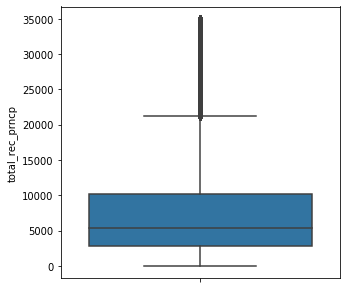

In [169]:
##Let us view the outliers using the boxplots
sns.boxplot(y= xtrain["total_rec_prncp"]); plt.show()

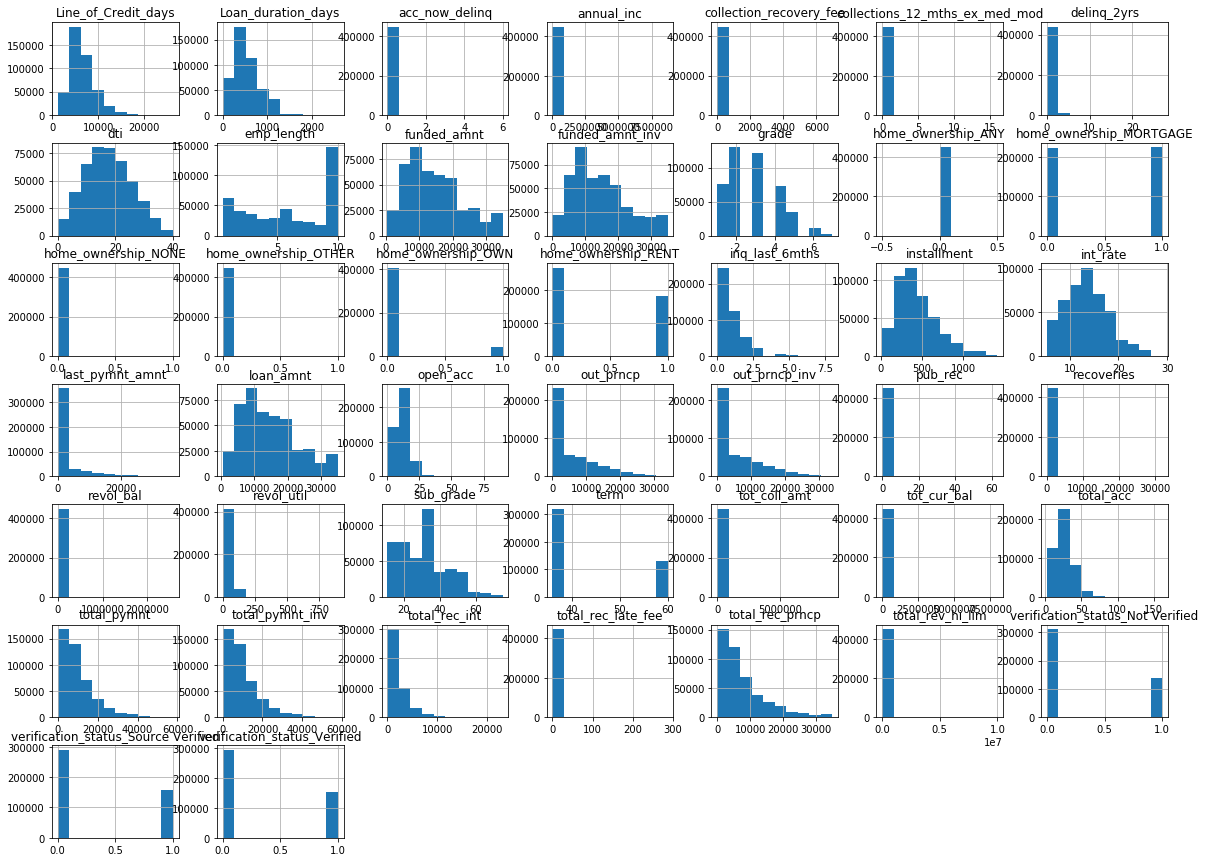

In [170]:
from pylab import rcParams
rcParams['figure.figsize']=20,15

xtrain.hist();plt.show()

In [171]:
xtrain["total_acc"].value_counts()

22.0     16408
21.0     16392
20.0     16360
23.0     16007
19.0     15977
         ...  
121.0        1
114.0        1
118.0        1
108.0        1
138.0        1
Name: total_acc, Length: 116, dtype: int64

In [172]:
xtrain.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'addr_state_mod',
       'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'purpose_mod', 'collections_12_mths_ex_med_mod',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'Loan_duration_days', 'Line_of_Credit_days'],
      dtype='object')

In [173]:
xtrain_scale1= xtrain.copy()
xtest_scale1= xtest.copy()

In [174]:
ytrain_scale1= ytrain.copy()

In [175]:
from sklearn.preprocessing import StandardScaler


xtrain_scale1[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'annual_inc',
        'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
        'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim',
       'collections_12_mths_ex_med_mod','Loan_duration_days','Line_of_Credit_days']] = StandardScaler().fit_transform(xtrain_scale1[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'annual_inc',
        'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
        'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim',
       'collections_12_mths_ex_med_mod','Line_of_Credit_days','Loan_duration_days']])



In [176]:
ytrain_scale1[['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','sub_grade','emp_length','annual_inc','dti','delinq_2yrs','inq_last_6mths',
       'open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
       'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','acc_now_delinq','tot_coll_amt','tot_cur_bal','total_rev_hi_lim',
       'collections_12_mths_ex_med_mod','Loan_duration_days','Line_of_Credit_days']]= StandardScaler().fit_transform(ytrain_scale1[['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','sub_grade','emp_length','annual_inc','dti','delinq_2yrs','inq_last_6mths',
       'open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
       'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','acc_now_delinq','tot_coll_amt','tot_cur_bal','total_rev_hi_lim',
       'collections_12_mths_ex_med_mod','Line_of_Credit_days','Loan_duration_days']]) 

In [177]:
from sklearn.linear_model import LogisticRegression
model1= LogisticRegression()

In [178]:
model1.fit(xtrain_scale1, xtest_scale1)

C:\Users\daniel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [179]:
from sklearn.tree import DecisionTreeClassifier

In [180]:
model2= DecisionTreeClassifier()

In [181]:
model2.fit(xtrain_scale1,xtest_scale1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [182]:
pred1= model1.predict(ytrain_scale1)
pred2= model2.predict(ytrain_scale1)

In [183]:
from scipy.stats import mode

In [184]:
from sklearn.ensemble import VotingClassifier

In [185]:
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
ult_mod=model.fit(xtrain_scale1,xtest_scale1)
model.score(ytrain_scale1,ytest)

C:\Users\daniel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9785568800293832

In [187]:
X2_scale= X2.copy()

X2_scale[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'annual_inc',
        'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
        'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim',
       'collections_12_mths_ex_med_mod','Loan_duration_days','Line_of_Credit_days']] = StandardScaler().fit_transform(X2_scale[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'annual_inc',
        'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
        'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim',
       'collections_12_mths_ex_med_mod','Loan_duration_days','Line_of_Credit_days']])

In [188]:
ult_model_final= model.fit(X2_scale,Y2)
prediction_final_train= ult_model_final.predict(X2_scale)

C:\Users\daniel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [189]:
from sklearn.metrics import confusion_matrix

In [190]:
cm= confusion_matrix(ytest,pred1)

In [191]:
cm

array([[138130,      8],
       [   507,  11100]], dtype=int64)

In [192]:
confusion1= confusion_matrix(Y2,prediction_final_train)

In [193]:
confusion1

array([[552822,      0],
       [  2015,  44141]], dtype=int64)

In [194]:
from sklearn.metrics import classification_report

In [195]:
cl= classification_report(ytest,pred1)
print(cl)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    138138
           1       1.00      0.96      0.98     11607

    accuracy                           1.00    149745
   macro avg       1.00      0.98      0.99    149745
weighted avg       1.00      1.00      1.00    149745



In [196]:
class_report= classification_report(Y2,prediction_final_train)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552822
           1       1.00      0.96      0.98     46156

    accuracy                           1.00    598978
   macro avg       1.00      0.98      0.99    598978
weighted avg       1.00      1.00      1.00    598978



In [197]:
X3= test_lend.drop(["default_ind"],axis=1)
Y3= test_lend["default_ind"]


xtrain1,ytrain1,xtest1,ytest1= train_test_split(X3,Y3,test_size=0.25,random_state=0)

In [198]:
xtrain_scale2= xtrain1.copy()
xtest_scale2= xtest1.copy()

In [199]:
ytrain_scale2= ytrain1.copy()

In [200]:
ytest_scale2= ytest1.copy()

In [201]:
xtrain_scale2[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'annual_inc',
        'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
        'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim',
       'collections_12_mths_ex_med_mod','Loan_duration_days','Line_of_Credit_days']] = StandardScaler().fit_transform(xtrain_scale2[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'annual_inc',
        'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
        'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim',
       'collections_12_mths_ex_med_mod','Line_of_Credit_days','Loan_duration_days']])

In [202]:
ytrain_scale2[['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','sub_grade','emp_length','annual_inc','dti','delinq_2yrs','inq_last_6mths',
       'open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
       'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','acc_now_delinq','tot_coll_amt','tot_cur_bal','total_rev_hi_lim',
       'collections_12_mths_ex_med_mod','Loan_duration_days','Line_of_Credit_days']]= StandardScaler().fit_transform(ytrain_scale2[['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','sub_grade','emp_length','annual_inc','dti','delinq_2yrs','inq_last_6mths',
       'open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
       'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','acc_now_delinq','tot_coll_amt','tot_cur_bal','total_rev_hi_lim',
       'collections_12_mths_ex_med_mod','Line_of_Credit_days','Loan_duration_days']]) 

In [203]:
xtest_scale2.value_counts()

0    192515
1       228
Name: default_ind, dtype: int64

In [204]:
from sklearn.linear_model import LogisticRegression
model1= LogisticRegression()


In [205]:
Logmod=model1.fit(xtrain_scale2,xtest_scale2)

C:\Users\daniel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [206]:
pred11= Logmod.predict(ytrain_scale2)

In [207]:
cm2= confusion_matrix(ytest_scale2,pred11)

In [208]:
cm2

array([[64164,     1],
       [   24,    59]], dtype=int64)

In [209]:
cl2= classification_report(ytest_scale2,pred11)

In [210]:
print(cl2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     64165
           1       0.98      0.71      0.83        83

    accuracy                           1.00     64248
   macro avg       0.99      0.86      0.91     64248
weighted avg       1.00      1.00      1.00     64248



In [211]:
X3_scale= X3.copy()
Y3_scale= Y3.copy()

In [212]:
X3_scale[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'annual_inc',
        'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
        'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim',
       'collections_12_mths_ex_med_mod','Loan_duration_days','Line_of_Credit_days']]= StandardScaler().fit_transform(X3[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'annual_inc',
        'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
        'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim',
       'collections_12_mths_ex_med_mod','Loan_duration_days','Line_of_Credit_days']])

In [213]:
mod_final=ult_model_final.fit(X3_scale,Y3_scale)

C:\Users\daniel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [214]:
prediction= mod_final.predict(X3_scale)

In [215]:
cm_final= confusion_matrix(Y3_scale,prediction)

In [216]:
cm_final

array([[256680,      0],
       [    92,    219]], dtype=int64)

In [217]:
class_final= classification_report(Y3_scale,prediction)

In [218]:
print(class_final)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       1.00      0.70      0.83       311

    accuracy                           1.00    256991
   macro avg       1.00      0.85      0.91    256991
weighted avg       1.00      1.00      1.00    256991

